In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
data=pd.read_csv("data/hypertension_dataset.csv")
data.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


In [3]:
data.columns

Index(['Age', 'Salt_Intake', 'Stress_Score', 'BP_History', 'Sleep_Duration',
       'BMI', 'Medication', 'Family_History', 'Exercise_Level',
       'Smoking_Status', 'Has_Hypertension'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB


In [6]:
data.shape

(1985, 11)

In [7]:
data.describe()

,Age,Salt_Intake,Stress_Score,Sleep_Duration,BMI
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,50.341058,8.531688,4.979345,6.452242,26.015315
std,19.442042,1.994907,3.142303,1.542207,4.512857
min,18.000000,2.500000,0.000000,1.500000,11.900000
25%,34.000000,7.200000,2.000000,5.400000,23.000000
50%,50.000000,8.500000,5.000000,6.500000,25.900000
75%,67.000000,9.900000,8.000000,7.500000,29.100000
max,84.000000,16.400000,10.000000,11.400000,41.900000


In [8]:
data.isna().sum()

Age                   0
Salt_Intake           0
Stress_Score          0
BP_History            0
Sleep_Duration        0
BMI                   0
Medication          799
Family_History        0
Exercise_Level        0
Smoking_Status        0
Has_Hypertension      0
dtype: int64

In [9]:
#Checking the sampling distribution of the target column and variables
dict={}
for val in data["Has_Hypertension"]:
    if val == "Yes":
        dict["Yes"]=dict.get("Yes",0)+1
    else:
        dict["No"]=dict.get("No",0)+1
print(dict)

{'Yes': 1032, 'No': 953}


In [10]:
data["Medication"].dtype

dtype('O')

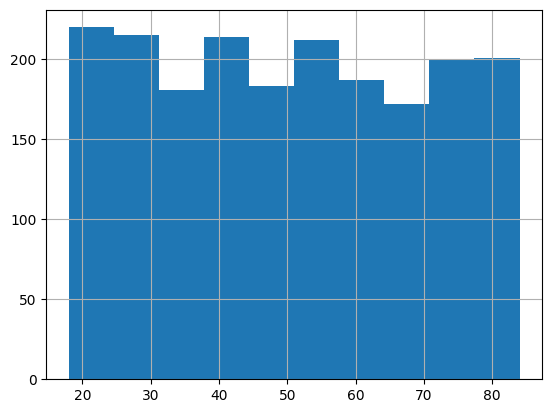

In [11]:
data["Age"].hist();

In [12]:
pd.crosstab(data["Age"],data["Has_Hypertension"]).head()

Has_Hypertension,No,Yes
Age,,
18,21,14
19,23,16
20,19,12
21,17,8
22,19,17


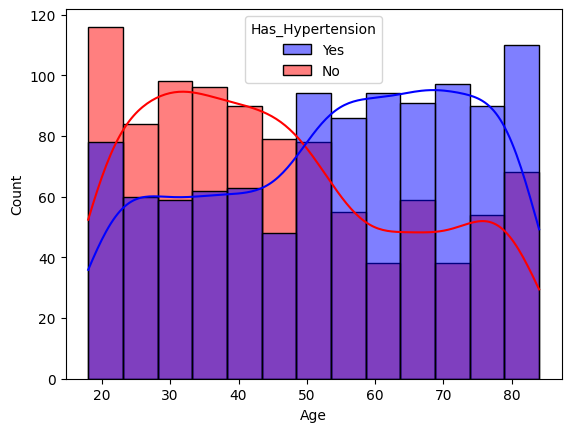

In [13]:
sns.histplot(data,x='Age',hue='Has_Hypertension',kde=True,palette={'No':'Red','Yes':'Blue'});

**So from this visualization we can say that aged/old people have more hypertension than youths.**

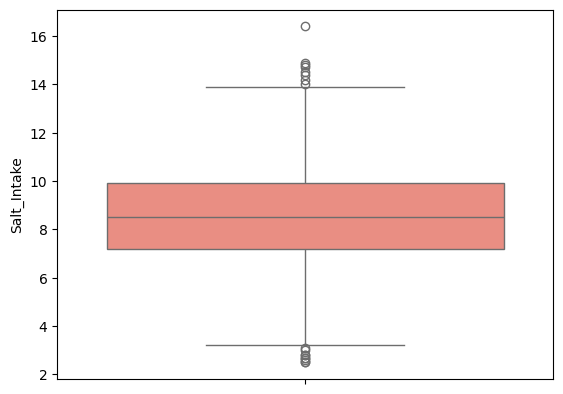

In [14]:
#Lets see distribution of the salt intake in patients
sns.boxplot(data['Salt_Intake'],color="salmon");

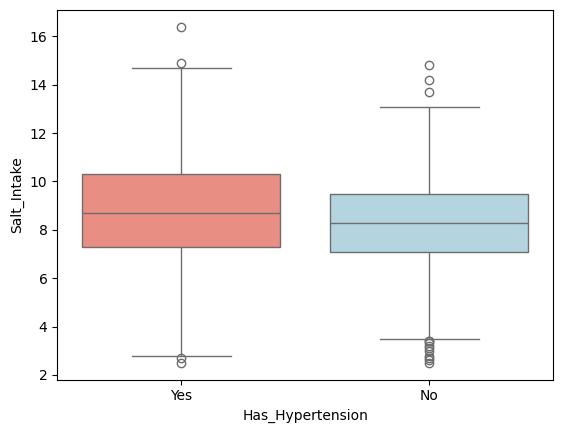

In [15]:
#Lets see the relation of salt intake with respect to hypertension
sns.boxplot(data,y=data['Salt_Intake'],x=data['Has_Hypertension'],hue="Has_Hypertension",palette={'Yes':"salmon",'No':"lightblue"});

**People with hypertension (Yes) have a higher median salt intake than those without.**

In [16]:
data.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


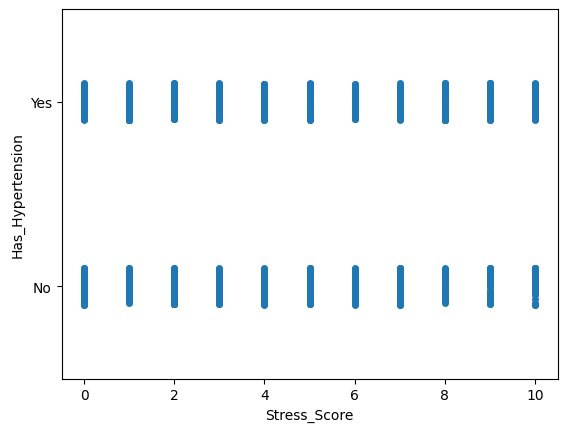

In [17]:
sns.stripplot(x="Stress_Score",y="Has_Hypertension",data=data,jitter=True);

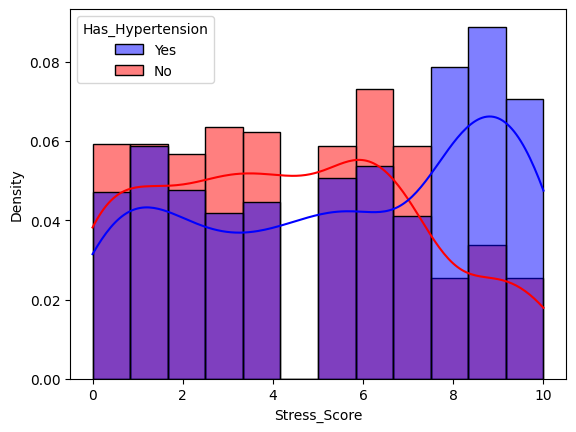

In [18]:
sns.histplot(data=data,x='Stress_Score',hue='Has_Hypertension',kde=True,stat='density',palette={'Yes':'Blue','No':'Red'});

**So people with more Stress_Score are more prone to suffer from hypertension.**

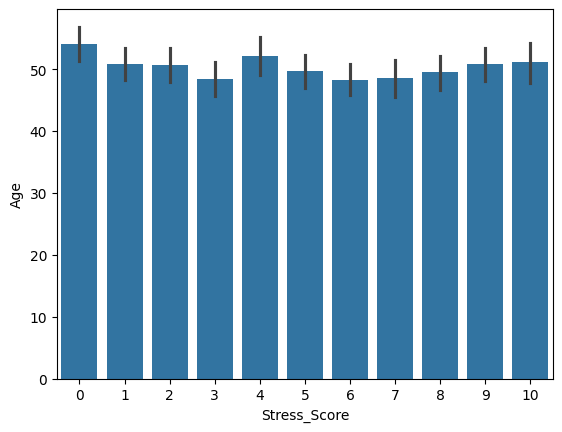

In [19]:
sns.barplot(y="Age",x="Stress_Score",data=data);

**So we can see there is no upward or downward trend in Stress_Score with respect to Age.**

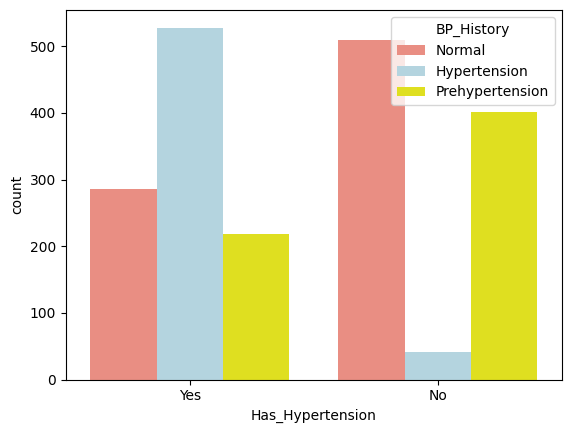

In [20]:
sns.countplot(data=data,x="Has_Hypertension",hue="BP_History",palette=["salmon","lightblue","yellow"]);

* People with lower BP has a lower hypertension count.

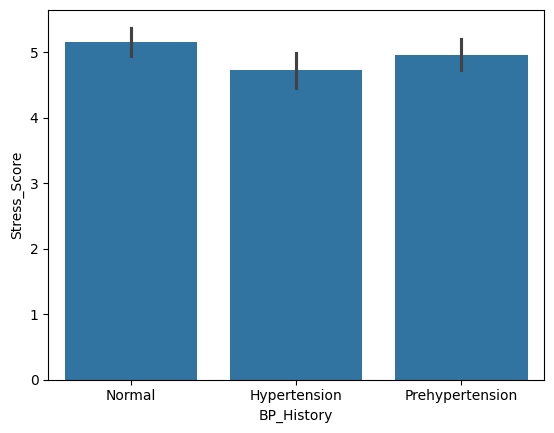

In [21]:
sns.barplot(y="Stress_Score",x="BP_History",data=data);

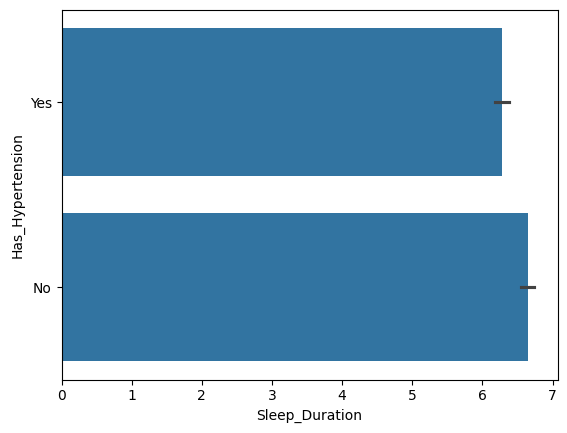

In [22]:
sns.barplot(data=data,x="Sleep_Duration",y="Has_Hypertension");

**People with higher average sleep duration suffers less from hypertension.**

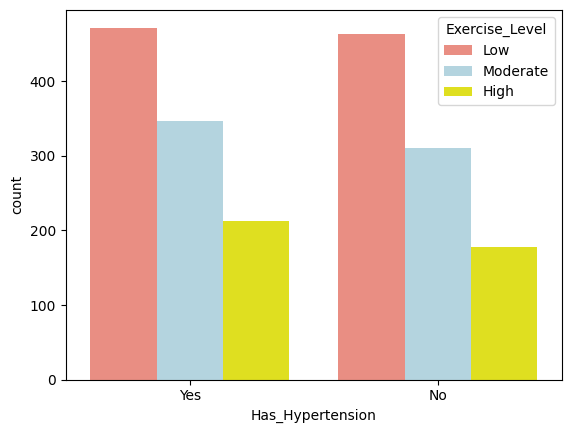

In [23]:
sns.countplot(data=data,x="Has_Hypertension",hue="Exercise_Level",palette=["salmon","lightblue","yellow"]);

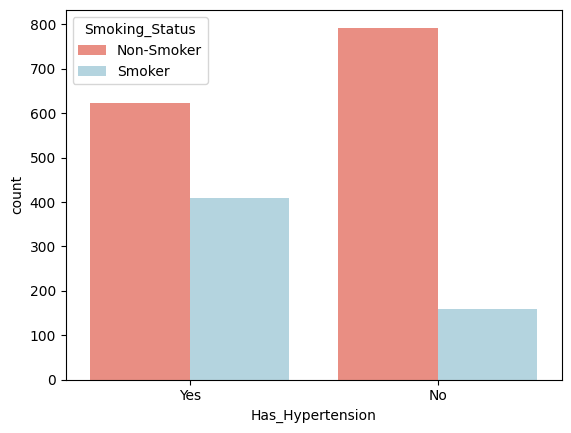

In [24]:
sns.countplot(data=data,hue="Smoking_Status",x="Has_Hypertension",palette=['salmon','lightblue']);

**Smokers suffers from hypertension but mostly non-smokers don't suffer from hypertension.**

In [25]:
data.drop("Medication",axis=1,inplace=True)

In [26]:
data.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,No,Moderate,Non-Smoker,No


In [27]:
data.isna().sum()

Age                 0
Salt_Intake         0
Stress_Score        0
BP_History          0
Sleep_Duration      0
BMI                 0
Family_History      0
Exercise_Level      0
Smoking_Status      0
Has_Hypertension    0
dtype: int64

In [29]:
data.to_csv("data/hypertension_cleaned.csv",index=False)